# The Defenitive Guide to  European Football 
---
Not so defenitive, deffinetly about European Football

## Overview
---
The Project's main aim is to provide a real life application for the various skills and methods included in the course. For us this project is about taking what was a purely theortical information, and turning this knowledge into practical tangible practices. The goal here is to take a dataset and apply the practices we learned throughout the year, to conclude tangible usable information. In our case we chose to work on, clean and deduce from the eurpoean football database. The three steps mentioned before are the main layout for our work on this project. Finally, we hope that our efforts here result in innformative competent conclusions about the current state of football in europe. 

## Motivation
---
We were first and formost driven by our growing intrest in the data engineering field. Secondly, our general love for the game itself was also a huge factor. These two factors combined is what mainly kept the team going. We were intrigued by the idea of how break throughs in the Big Data field for example affect modern football. More and more teams are relying on data analysts and algorithims to make big decisions. Wether buying a new player, signing a new manager or even signing a new sposnorship deal, big teams mainly from eaurope are moving more towards trusting the data, and relying on the findings of data scientists. This provides a huge opportunity for engineers like us who are avid football fans. Combining two of our intrests into one, an opportunity not to miss.


## Refrences and Related Work
---
### Provided below are some of the links we found usefull whilst working on this project
* [Link to a Github repo with the some processing on the same database we're using](https://github.com/706917/soccer_database_analysis/blob/master/Investigate_a_Dataset.ipynb)
* [Same Database, but some different ideas and techniques](https://jiayiwangjw.github.io/2017/06/12/SoccerDataAnalysis/)
* [Some General Notes on the data itself](http://www.football-data.co.uk/notes.txt)
* [A non-football fan's attempt to understand football through data analysis](https://github.com/706917/soccer_database_analysis)
* [The Combined Overall Rating](https://github.com/706917/soccer_database_analysis/blob/master/Investigate_a_Dataset.ipynb)

## Questions?
---
In our minds from the moment we started working on this project we had a couple of questions that we wanted to answer through the data and our analysis of the data. All of our minor questions eventually lead to one big collective enquiry into how the game itself works.

---

* What makes a football team succesful? Which factors directly contribute to the success of a football team?
* Does home advantage really exist? Does a team playing home infront of the home crowd have a higher chance in winning the game?
* Why are certain football leagues more succeful than others?
* Do higher quality players gurantee the success of a team?

## Data Cleaning
---

#### Inspecting the data

In [61]:

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import itertools

In [49]:
# setting tha max number of rows and columns to fit the screen
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [50]:
# Reading the sql data into tables
con = sqlite3.connect('database.sqlite')
country = pd.read_sql_query("SELECT * from country", con)
League = pd.read_sql_query("SELECT * from League", con)
Match =  pd.read_sql_query("SELECT * from Match where Match.date > '2010-12-31'", con)
Player = pd.read_sql_query("SELECT * from Player", con)
Player_Attributes = pd.read_sql_query("SELECT * from Player_Attributes", con)
Team = pd.read_sql_query("SELECT * from Team", con)
Team_Attributes = pd.read_sql_query("SELECT * from Team_Attributes where Team_Attributes.date > '2010-12-31'", con)

## Cleaning Table Match

In [4]:
# To remove duplicates 
Match.sort_values("id", inplace = True) 
Match.drop_duplicates(subset ="id", keep = False, inplace = True) 

In [5]:
Match.describe()

id    country_id     league_id         stage  match_api_id  home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  home_player_X1  home_player_X2  home_player_X3  home_player_X4  home_player_X5  home_player_X6  home_player_X7  home_player_X8  home_player_X9  home_player_X10  home_player_X11  away_player_X1  away_player_X2  away_player_X3  away_player_X4  away_player_X5  away_player_X6  away_player_X7  away_player_X8  away_player_X9  away_player_X10  away_player_X11  home_player_Y1  home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  home_player_Y6  home_player_Y7  home_player_Y8  home_player_Y9  home_player_Y10  home_player_Y11  away_player_Y1  away_player_Y2  away_player_Y3  away_player_Y4  away_player_Y5  away_player_Y6  away_player_Y7  away_player_Y8  away_player_Y9  away_player_Y10  away_player_Y11  home_player_1  home_player_2  home_player_3  home_player_4  home_player_5  home_player_6  home_player_7  home_player_8  home_player_9  \
count  17810.000000  17810.000000  17810.000000  17810.000000  1.781000e+04      17810.000000      17810.000000    17810.000000    17810.000000    17210.000000    17210.000000    17210.000000    17210.000000    17210.000000    17210.000000    17210.000000    17210.000000    17210.000000     17210.000000     17210.000000    17210.000000    17210.000000    17210.000000    17210.000000    17210.000000    17210.000000    17210.000000    17210.000000    17209.000000     17209.000000     17206.000000    17210.000000         17210.0    17210.000000    17210.000000    17210.000000    17210.000000    17210.000000    17210.000000    17210.000000     17210.000000     17210.000000    17210.000000         17210.0    17210.000000    17210.000000    17210.000000    17210.000000    17210.000000    17210.000000    17209.000000     17209.000000     17206.000000   17628.000000   17585.000000   17599.000000   17552.000000   17597.000000   17585.000000   17602.000000   17590.000000   17598.000000   
mean   13500.231499  11859.489220  11859.489220     19.043515  1.448714e+06      10385.349803      10393.377597        1.550646        1.179562        1.000058        2.089483        4.074375        6.048867        7.482510        3.350959        4.900000        5.186752        5.547240         5.557467         5.752121        1.000407        2.090354        4.071935        6.053283        7.453051        3.376177        4.869843        5.176932        5.531001         5.629961         5.741311        1.000116             3.0        3.000116        3.000581        3.269901        6.451772        6.653167        7.318594        8.168216         9.120453        10.491691        1.000349             3.0        3.000232        3.000349        3.282394        6.436781        6.662522        7.324288        8.167993         9.074438        10.506335   91312.140345  130485.007904  110343.429740  113852.358193  132291.380065  124795.704748  117273.485627  130497.064412  135310.863507   
std     7392.596695   7509.290425   7509.290425     10.383346  3.810282e+05      16805.295869      16821.048451        1.306154        1.152618        0.007623        0.427306        0.427483        0.488695        1.710992        1.202594        1.121657        1.783796        1.933404         1.449073         0.805674        0.039608        0.452554        0.430878        0.494853        1.749336        1.262157        1.149685        1.783477        1.921575         1.485862         0.808613        0.015245             0.0        0.015245        0.034086        0.999718        0.713079        0.590015        0.577240        1.126442         1.073544         0.513478        0.026404             0.0        0.030491        0.034089        1.021404        0.742902        0.590565        0.569793        1.128776         1.094066         0.501020   98447.347627  123364.836101  114487.262288  114173.850794  123543.327905  123083.051941  119095.288394  125951.138587  127543.312474   
min      572.000000      1.000000      1.

In [6]:
# iterating the columns 
for col in Match.columns: 
    print(col) 

id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
a

In [7]:
# Setting the goal column to the summation of the home team goal and away team goal 
Match.goal = Match.home_team_goal + Match.away_team_goal

In [8]:
Match.head(10)

id  country_id  league_id     season  stage                 date  match_api_id  home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  home_player_X1  home_player_X2  home_player_X3  home_player_X4  home_player_X5  home_player_X6  home_player_X7  home_player_X8  home_player_X9  home_player_X10  home_player_X11  away_player_X1  away_player_X2  away_player_X3  away_player_X4  away_player_X5  away_player_X6  away_player_X7  away_player_X8  away_player_X9  away_player_X10  away_player_X11  home_player_Y1  home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  home_player_Y6  home_player_Y7  home_player_Y8  home_player_Y9  home_player_Y10  home_player_Y11  away_player_Y1  away_player_Y2  away_player_Y3  away_player_Y4  away_player_Y5  away_player_Y6  away_player_Y7  away_player_Y8  away_player_Y9  away_player_Y10  away_player_Y11  home_player_1  home_player_2  home_player_3  home_player_4  home_player_5  home_player_6  home_player_7  home_player_8  home_player_9  \
0  572           1          1  2010/2011     15  2011-01-18 00:00:00        838661              6351              8203               0               1             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             3.0              5.0              7.0             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             3.0              5.0              7.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0            10.0             10.0             10.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0            10.0             10.0             10.0        67949.0       150396.0        45413.0       181051.0         6771.0         7683.0        25751.0        39312.0        38792.0   
1  585           1          1  2010/2011     17  2011-01-18 00:00:00        838684              8571              9994               0               0             1.0             2.0             4.0             6.0             8.0             2.0             4.0             6.0             8.0              4.0              6.0             1.0             3.0             5.0             7.0             2.0             4.0             6.0             8.0             3.0              4.0              7.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0             7.0             10.0             10.0             1.0             3.0             3.0             3.0             7.0             7.0             7.0             7.0            10.0             10.0             10.0        37971.0        37887.0        26109.0       149279.0       186621.0        38249.0        38945.0        38257.0        40521.0   
2  593           1          1  2010/2011     18  2011-03-23 00:00:00        838698              9986              9984               0               3             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             5.0              3.0              7.0             1.0             1.0             3.0             5.0             7.0             9.0             3.0             5.0             7.0              4.0              6.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0            10.0             10.0             10.0             1.0             3.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0             10.0             10.0       104388.0        45469.0            NaN       166684.0            NaN       239352.0       200634.0        39145.0            NaN   


In [9]:
# Finfing the number of nulls in each column
Match.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1        600
home_player_X2        600
home_player_X3        600
home_player_X4        600
home_player_X5        600
home_player_X6        600
home_player_X7        600
home_player_X8        600
home_player_X9        600
home_player_X10       600
home_player_X11       600
away_player_X1        600
away_player_X2        600
away_player_X3        600
away_player_X4        600
away_player_X5        600
away_player_X6        600
away_player_X7        600
away_player_X8        600
away_player_X9        601
away_player_X10       601
away_player_X11       604
home_player_Y1        600
home_player_Y2        600
home_player_Y3        600
home_player_Y4        600
home_player_Y5        600
home_player_

In [10]:
# Dropping columns that contain nulls and can not be imputed 
Match = Match.drop(columns=['shoton', 'shotoff','foulcommit','card','cross','corner','possession'])

In [11]:
Match.loc[Match['home_team_api_id'] == 7896]

id  country_id  league_id     season  stage                 date  match_api_id  home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  home_player_X1  home_player_X2  home_player_X3  home_player_X4  home_player_X5  home_player_X6  home_player_X7  home_player_X8  home_player_X9  home_player_X10  home_player_X11  away_player_X1  away_player_X2  away_player_X3  away_player_X4  away_player_X5  away_player_X6  away_player_X7  away_player_X8  away_player_X9  away_player_X10  away_player_X11  home_player_Y1  home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  home_player_Y6  home_player_Y7  home_player_Y8  home_player_Y9  home_player_Y10  home_player_Y11  away_player_Y1  away_player_Y2  away_player_Y3  away_player_Y4  away_player_Y5  away_player_Y6  away_player_Y7  away_player_Y8  away_player_Y9  away_player_Y10  away_player_Y11  home_player_1  home_player_2  home_player_3  home_player_4  home_player_5  home_player_6  home_player_7  home_player_8  \
17646  25816       24558      24558  2015/2016     12  2015-10-18 00:00:00       1992107              7896             10190               3               1             1.0             2.0             4.0             6.0             8.0             5.0             4.0             6.0             3.0              5.0              7.0             1.0             2.0             4.0             6.0             8.0             5.0             2.0             4.0             6.0              8.0              5.0             1.0             3.0             3.0             3.0             3.0             6.0             8.0             8.0            10.0             10.0             10.0             1.0             3.0             3.0             3.0             3.0             6.0             8.0             8.0             8.0              8.0             11.0            NaN         8881.0       173534.0        41415.0       282287.0       491221.0       393337.0         8893.0   
17656  25826       24558      24558  2015/2016     14  2015-11-01 00:00:00       1992117              7896             10179               3               0             1.0             2.0             4.0             6.0             8.0             5.0             4.0             6.0             3.0              5.0              7.0             1.0             2.0             4.0             6.0             8.0             4.0             6.0             3.0             5.0              7.0              5.0             1.0             3.0             3.0             3.0             3.0             6.0             8.0             8.0            10.0             10.0             10.0             1.0             3.0             3.0             3.0             3.0             6.0             6.0             8.0             8.0              8.0             11.0        41975.0         8881.0       173534.0        41415.0       282287.0       491221.0       393337.0         8893.0   
17661  25831       24558      24558  2015/2016     15  2015-11-07 00:00:00       1992122              7896             10192               1               1             1.0             2.0             4.0             6.0             8.0             5.0             4.0             6.0             3.0              5.0              7.0             1.0             2.0             4.0             6.0             8.0             4.0             6.0             3.0             5.0              7.0              5.0             1.0             3.0             3.0             3.0             3.0             6.0             8.0             8.0            10.0             10.0             10.0             1.0             3.0             3.0             3.0             3.0             6.0             6.0             8.0             8.0              8.0             11.0        41975.0         8881.0        41415.0       173534.0       282287.0       491221.0       393337.0         8893.0   
17675  25845       24558      24558  2015/

In [12]:
Match.loc[Match['away_team_api_id'] == 7896]

id  country_id  league_id     season  stage                 date  match_api_id  home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  home_player_X1  home_player_X2  home_player_X3  home_player_X4  home_player_X5  home_player_X6  home_player_X7  home_player_X8  home_player_X9  home_player_X10  home_player_X11  away_player_X1  away_player_X2  away_player_X3  away_player_X4  away_player_X5  away_player_X6  away_player_X7  away_player_X8  away_player_X9  away_player_X10  away_player_X11  home_player_Y1  home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  home_player_Y6  home_player_Y7  home_player_Y8  home_player_Y9  home_player_Y10  home_player_Y11  away_player_Y1  away_player_Y2  away_player_Y3  away_player_Y4  away_player_Y5  away_player_Y6  away_player_Y7  away_player_Y8  away_player_Y9  away_player_Y10  away_player_Y11  home_player_1  home_player_2  home_player_3  home_player_4  home_player_5  home_player_6  home_player_7  home_player_8  \
17633  25803       24558      24558  2015/2016      1  2015-07-19 00:00:00       1992055             10190              7896               2               0             1.0             2.0             4.0             6.0             8.0             4.0             6.0             3.0             5.0              7.0              5.0             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             4.0              6.0              5.0             1.0             3.0             3.0             3.0             3.0             6.0             6.0             8.0             8.0              8.0             11.0             1.0             3.0             3.0             3.0             3.0             6.0             6.0             6.0             8.0              8.0             11.0        42231.0        45780.0        95220.0       638592.0       120082.0       171229.0       308309.0       143790.0   
17635  25805       24558      24558  2015/2016     10  2015-09-26 00:00:00       1992096              9931              7896               3               1             1.0             2.0             4.0             6.0             8.0             4.0             6.0             3.0             5.0              7.0              5.0             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             3.0              5.0              7.0             1.0             3.0             3.0             3.0             3.0             6.0             6.0             8.0             8.0              8.0             11.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0            10.0             10.0             10.0       156175.0        30835.0       172768.0        22834.0        95216.0        25772.0       339992.0       176206.0   
17640  25810       24558      24558  2015/2016     11  2015-10-03 00:00:00       1992101             10199              7896               2               2             1.0             2.0             4.0             6.0             8.0             5.0             4.0             6.0             5.0              4.0              6.0             1.0             2.0             4.0             6.0             8.0             5.0             4.0             6.0             3.0              5.0              7.0             1.0             3.0             3.0             3.0             3.0             6.0             7.0             7.0             9.0             11.0             11.0             1.0             3.0             3.0             3.0             3.0             6.0             8.0             8.0            10.0             10.0             10.0        42276.0       114792.0       150007.0       178119.0        27232.0        73977.0       260708.0       201704.0   
17653  25823       24558      24558  2015/

In [13]:
Match_new = Match[Match.away_team_api_id != 7896]
Match_new = Match_new[Match_new.home_team_api_id != 7896]
Match_new

id  country_id  league_id     season  stage                 date  match_api_id  home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  home_player_X1  home_player_X2  home_player_X3  home_player_X4  home_player_X5  home_player_X6  home_player_X7  home_player_X8  home_player_X9  home_player_X10  home_player_X11  away_player_X1  away_player_X2  away_player_X3  away_player_X4  away_player_X5  away_player_X6  away_player_X7  away_player_X8  away_player_X9  away_player_X10  away_player_X11  home_player_Y1  home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  home_player_Y6  home_player_Y7  home_player_Y8  home_player_Y9  home_player_Y10  home_player_Y11  away_player_Y1  away_player_Y2  away_player_Y3  away_player_Y4  away_player_Y5  away_player_Y6  away_player_Y7  away_player_Y8  away_player_Y9  away_player_Y10  away_player_Y11  home_player_1  home_player_2  home_player_3  home_player_4  home_player_5  home_player_6  home_player_7  home_player_8  \
0        572           1          1  2010/2011     15  2011-01-18 00:00:00        838661              6351              8203               0               1             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             3.0              5.0              7.0             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             3.0              5.0              7.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0            10.0             10.0             10.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0            10.0             10.0             10.0        67949.0       150396.0        45413.0       181051.0         6771.0         7683.0        25751.0        39312.0   
1        585           1          1  2010/2011     17  2011-01-18 00:00:00        838684              8571              9994               0               0             1.0             2.0             4.0             6.0             8.0             2.0             4.0             6.0             8.0              4.0              6.0             1.0             3.0             5.0             7.0             2.0             4.0             6.0             8.0             3.0              4.0              7.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0             7.0             10.0             10.0             1.0             3.0             3.0             3.0             7.0             7.0             7.0             7.0            10.0             10.0             10.0        37971.0        37887.0        26109.0       149279.0       186621.0        38249.0        38945.0        38257.0   
2        593           1          1  2010/2011     18  2011-03-23 00:00:00        838698              9986              9984               0               3             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             5.0              3.0              7.0             1.0             1.0             3.0             5.0             7.0             9.0             3.0             5.0             7.0              4.0              6.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0            10.0             10.0             10.0             1.0             3.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0             10.0             10.0       104388.0        45469.0            NaN       166684.0            NaN       239352.0       200634.0        39145.0   
3        595           1          1  2010/

In [14]:
Match.loc[np.logical_or(Match.away_team_api_id == 8203,Match.home_team_api_id == 8203)]

id  country_id  league_id     season  stage                 date  match_api_id  home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  home_player_X1  home_player_X2  home_player_X3  home_player_X4  home_player_X5  home_player_X6  home_player_X7  home_player_X8  home_player_X9  home_player_X10  home_player_X11  away_player_X1  away_player_X2  away_player_X3  away_player_X4  away_player_X5  away_player_X6  away_player_X7  away_player_X8  away_player_X9  away_player_X10  away_player_X11  home_player_Y1  home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  home_player_Y6  home_player_Y7  home_player_Y8  home_player_Y9  home_player_Y10  home_player_Y11  away_player_Y1  away_player_Y2  away_player_Y3  away_player_Y4  away_player_Y5  away_player_Y6  away_player_Y7  away_player_Y8  away_player_Y9  away_player_Y10  away_player_Y11  home_player_1  home_player_2  home_player_3  home_player_4  home_player_5  home_player_6  home_player_7  home_player_8  \
0      572           1          1  2010/2011     15  2011-01-18 00:00:00        838661              6351              8203               0               1             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             3.0              5.0              7.0             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             3.0              5.0              7.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0            10.0             10.0             10.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0            10.0             10.0             10.0        67949.0       150396.0        45413.0       181051.0         6771.0         7683.0        25751.0        39312.0   
3      595           1          1  2010/2011     18  2011-02-15 00:00:00        838701              9989              8203               2               1             1.0             3.0             5.0             7.0             2.0             4.0             6.0             8.0             3.0              4.0              7.0             1.0             2.0             4.0             6.0             8.0             1.0             3.0             5.0             7.0              9.0              5.0             1.0             3.0             3.0             3.0             7.0             7.0             7.0             7.0            10.0             10.0             10.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0             7.0              7.0             11.0        20747.0        38788.0        36844.0         6798.0       111973.0        39931.0       213111.0       164582.0   
5      615           1          1  2010/2011     20  2011-02-23 00:00:00        838723              9997              8203               0               1             1.0             2.0             4.0             6.0             8.0             2.0             4.0             6.0             8.0              4.0              6.0             1.0             2.0             4.0             6.0             8.0             2.0             4.0             6.0             8.0              4.0              6.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0             7.0             10.0             10.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0             7.0             10.0             10.0        38962.0        38347.0       178486.0       104415.0       149150.0        38354.0        37866.0        36522.0   
9      625           1          1  2010/2011    

In [15]:
#Delete betting columns with almost 50% of rows NaNs.
del Match['PSH']
del Match['PSA']
del Match['PSD']
del Match['GBH']
del Match['GBD']
del Match['GBA']
del Match['BSD']
del Match['BSA']
del Match['BSH']
Match

id  country_id  league_id     season  stage                 date  match_api_id  home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  home_player_X1  home_player_X2  home_player_X3  home_player_X4  home_player_X5  home_player_X6  home_player_X7  home_player_X8  home_player_X9  home_player_X10  home_player_X11  away_player_X1  away_player_X2  away_player_X3  away_player_X4  away_player_X5  away_player_X6  away_player_X7  away_player_X8  away_player_X9  away_player_X10  away_player_X11  home_player_Y1  home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  home_player_Y6  home_player_Y7  home_player_Y8  home_player_Y9  home_player_Y10  home_player_Y11  away_player_Y1  away_player_Y2  away_player_Y3  away_player_Y4  away_player_Y5  away_player_Y6  away_player_Y7  away_player_Y8  away_player_Y9  away_player_Y10  away_player_Y11  home_player_1  home_player_2  home_player_3  home_player_4  home_player_5  home_player_6  home_player_7  home_player_8  \
0        572           1          1  2010/2011     15  2011-01-18 00:00:00        838661              6351              8203               0               1             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             3.0              5.0              7.0             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             3.0              5.0              7.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0            10.0             10.0             10.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0            10.0             10.0             10.0        67949.0       150396.0        45413.0       181051.0         6771.0         7683.0        25751.0        39312.0   
1        585           1          1  2010/2011     17  2011-01-18 00:00:00        838684              8571              9994               0               0             1.0             2.0             4.0             6.0             8.0             2.0             4.0             6.0             8.0              4.0              6.0             1.0             3.0             5.0             7.0             2.0             4.0             6.0             8.0             3.0              4.0              7.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0             7.0             10.0             10.0             1.0             3.0             3.0             3.0             7.0             7.0             7.0             7.0            10.0             10.0             10.0        37971.0        37887.0        26109.0       149279.0       186621.0        38249.0        38945.0        38257.0   
2        593           1          1  2010/2011     18  2011-03-23 00:00:00        838698              9986              9984               0               3             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             5.0              3.0              7.0             1.0             1.0             3.0             5.0             7.0             9.0             3.0             5.0             7.0              4.0              6.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0            10.0             10.0             10.0             1.0             3.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0             10.0             10.0       104388.0        45469.0            NaN       166684.0            NaN       239352.0       200634.0        39145.0   
3        595           1          1  2010/

In [16]:
#Impute B365 columns based on the mean value of the other betting comapnies for each row.Home , Away and Draw respectively.
Match.apply(lambda B365H: B365H.fillna(Match[['BWH','IWH','LBH','WHH','SJH','VCH']].mean(),inplace =True),axis = 1)
Match.apply(lambda B365A: B365A.fillna(Match[['BWA','IWA','LBA','WHA','SJA','VCA']].mean(),inplace =True),axis = 1)
Match.apply(lambda B365D: B365D.fillna(Match[['BWD','IWD','LBD','WHD','SJD','VCD']].mean(),inplace =True),axis = 1)
#Impute BW columns based on the min value of the other betting comapnies for each row.Home , Away and Draw respectively.
Match.apply(lambda BWH: BWH.fillna(Match[['B365H','IWH','LBH','WHH','SJH','VCH']].min(),inplace =True),axis = 1)
Match.apply(lambda BWA: BWA.fillna(Match[['B365A','IWA','LBA','WHA','SJA','VCA']].min(),inplace =True),axis = 1)
Match.apply(lambda BWD: BWD.fillna(Match[['B365D','IWD','LBD','WHD','SJD','VCD']].min(),inplace =True),axis = 1)
#Impute IW columns based on the min value of the other betting comapnies for each row.Home , Away and Draw respectively.
Match.apply(lambda IWH: IWH.fillna(Match[['B365H','BWH','LBH','WHH','SJH','VCH']].min(),inplace =True),axis = 1)
Match.apply(lambda IWA: IWA.fillna(Match[['B365A','BWA','LBA','WHA','SJA','VCA']].min(),inplace =True),axis = 1)
Match.apply(lambda IWD: IWD.fillna(Match[['B365D','BWD','LBD','WHD','SJD','VCD']].min(),inplace =True),axis = 1)
#Impute LB columns based on the max value of the other betting comapnies for each row.Home , Away and Draw respectively.
Match.apply(lambda LBH: LBH.fillna(Match[['B365H','IWH','BWH','WHH','SJH','VCH']].max(),inplace =True),axis = 1)
Match.apply(lambda LBA: LBA.fillna(Match[['B365A','IWA','BWA','WHA','SJA','VCA']].max(),inplace =True),axis = 1)
Match.apply(lambda LBD: LBD.fillna(Match[['B365D','IWD','BWD','WHD','SJD','VCD']].max(),inplace =True),axis = 1)
#Impute WH columns based on the mean value of the other betting comapnies for each row.Home , Away and Draw respectively.
Match.apply(lambda WHH: WHH.fillna(Match[['B365H','IWH','LBH','BWH','SJH','VCH']].mean(),inplace =True),axis = 1)
Match.apply(lambda WHA: WHA.fillna(Match[['B365A','IWA','LBA','BWA','SJA','VCA']].mean(),inplace =True),axis = 1)
Match.apply(lambda WHD: WHD.fillna(Match[['B365D','IWD','LBD','BWD','SJD','VCD']].mean(),inplace =True),axis = 1)
#Impute SJ columns based on the min value of the other betting comapnies for each row.Home , Away and Draw respectively.
Match.apply(lambda SJH: SJH.fillna(Match[['B365H','BWH','LBH','WHH','IWH','VCH']].min(),inplace =True),axis = 1)
Match.apply(lambda SJA: SJA.fillna(Match[['B365A','BWA','LBA','WHA','IWA','VCA']].min(),inplace =True),axis = 1)
Match.apply(lambda SJD: SJD.fillna(Match[['B365D','BWD','LBD','WHD','IWD','VCD']].min(),inplace =True),axis = 1)
#Impute VC columns based on the max value of the other betting comapnies for each row.Home , Away and Draw respectively.
Match.apply(lambda VCH: VCH.fillna(Match[['B365H','IWH','BWH','WHH','SJH','LBH']].max(),inplace =True),axis = 1)
Match.apply(lambda VCA: VCA.fillna(Match[['B365A','IWA','BWA','WHA','SJA','LBA']].max(),inplace =True),axis = 1)
Match.apply(lambda VCD: VCD.fillna(Match[['B365D','IWD','BWD','WHD','SJD','LBD']].max(),inplace =True),axis = 1)

Match

KeyboardInterrupt: 

In [17]:
#Impute B365 columns that have all betting comapnies with NaNs with the mean value.Home , Away and Draw respectively.
Match.B365H.fillna(Match["B365H"].mean(),inplace =True)
Match.B365A.fillna(Match["B365A"].mean(),inplace = True)
Match.B365D.fillna(Match["B365D"].mean(),inplace = True)
#Impute BW columns that have all betting comapnies with NaNs with the min value.Home , Away and Draw respectively.
Match.BWH.fillna(Match["BWH"].min(),inplace = True)
Match.BWA.fillna(Match["BWA"].min(),inplace = True)
Match.BWD.fillna(Match["BWD"].min(),inplace = True)
#Impute IW columns that have all betting comapnies with NaNs with the min value.Home , Away and Draw respectively.
Match.IWH.fillna(Match["IWH"].min(),inplace = True)
Match.IWA.fillna(Match["IWA"].min(),inplace = True)
Match.IWD.fillna(Match["IWD"].min(),inplace = True)
#Impute LB columns that have all betting comapnies with NaNs with the max value.Home , Away and Draw respectively.
Match.LBH.fillna(Match["LBH"].max(),inplace = True)
Match.LBA.fillna(Match["LBA"].max(),inplace = True)
Match.LBD.fillna(Match["LBD"].max(),inplace = True)
#Impute WH columns that have all betting comapnies with NaNs with the mean value.Home , Away and Draw respectively.
Match.WHH.fillna(Match["WHH"].mean(),inplace = True)
Match.WHA.fillna(Match["WHA"].mean(),inplace = True)
Match.WHD.fillna(Match["WHD"].mean(),inplace = True)
#Impute SJ columns that have all betting comapnies with NaNs with the min value.Home , Away and Draw respectively.
Match.SJH.fillna(Match["SJH"].min(),inplace = True)
Match.SJA.fillna(Match["SJA"].min(),inplace = True)
Match.SJD.fillna(Match["SJD"].min(),inplace = True)
#Impute VC columns that have all betting comapnies with NaNs with the max value.Home , Away and Draw respectively.
Match.VCH.fillna(Match["VCH"].max(),inplace = True)
Match.VCA.fillna(Match["VCA"].max(),inplace = True)
Match.VCD.fillna(Match["VCD"].max(),inplace = True)
Match

id  country_id  league_id     season  stage                 date  match_api_id  home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  home_player_X1  home_player_X2  home_player_X3  home_player_X4  home_player_X5  home_player_X6  home_player_X7  home_player_X8  home_player_X9  home_player_X10  home_player_X11  away_player_X1  away_player_X2  away_player_X3  away_player_X4  away_player_X5  away_player_X6  away_player_X7  away_player_X8  away_player_X9  away_player_X10  away_player_X11  home_player_Y1  home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  home_player_Y6  home_player_Y7  home_player_Y8  home_player_Y9  home_player_Y10  home_player_Y11  away_player_Y1  away_player_Y2  away_player_Y3  away_player_Y4  away_player_Y5  away_player_Y6  away_player_Y7  away_player_Y8  away_player_Y9  away_player_Y10  away_player_Y11  home_player_1  home_player_2  home_player_3  home_player_4  home_player_5  home_player_6  home_player_7  home_player_8  \
0        572           1          1  2010/2011     15  2011-01-18 00:00:00        838661              6351              8203               0               1             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             3.0              5.0              7.0             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             3.0              5.0              7.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0            10.0             10.0             10.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0            10.0             10.0             10.0        67949.0       150396.0        45413.0       181051.0         6771.0         7683.0        25751.0        39312.0   
1        585           1          1  2010/2011     17  2011-01-18 00:00:00        838684              8571              9994               0               0             1.0             2.0             4.0             6.0             8.0             2.0             4.0             6.0             8.0              4.0              6.0             1.0             3.0             5.0             7.0             2.0             4.0             6.0             8.0             3.0              4.0              7.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0             7.0             10.0             10.0             1.0             3.0             3.0             3.0             7.0             7.0             7.0             7.0            10.0             10.0             10.0        37971.0        37887.0        26109.0       149279.0       186621.0        38249.0        38945.0        38257.0   
2        593           1          1  2010/2011     18  2011-03-23 00:00:00        838698              9986              9984               0               3             1.0             2.0             4.0             6.0             8.0             3.0             5.0             7.0             5.0              3.0              7.0             1.0             1.0             3.0             5.0             7.0             9.0             3.0             5.0             7.0              4.0              6.0             1.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0            10.0             10.0             10.0             1.0             3.0             3.0             3.0             3.0             3.0             7.0             7.0             7.0             10.0             10.0       104388.0        45469.0            NaN       166684.0            NaN       239352.0       200634.0        39145.0   
3        595           1          1  2010/

In [17]:
Match.dropna(inplace = True)
Match.isnull().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
home_player_X1      0
home_player_X2      0
home_player_X3      0
home_player_X4      0
home_player_X5      0
home_player_X6      0
home_player_X7      0
home_player_X8      0
home_player_X9      0
home_player_X10     0
home_player_X11     0
away_player_X1      0
away_player_X2      0
away_player_X3      0
away_player_X4      0
away_player_X5      0
away_player_X6      0
away_player_X7      0
away_player_X8      0
away_player_X9      0
away_player_X10     0
away_player_X11     0
home_player_Y1      0
home_player_Y2      0
home_player_Y3      0
home_player_Y4      0
home_player_Y5      0
home_player_Y6      0
home_player_Y7      0
home_player_Y8      0
home_player_Y9      0
home_player_Y10     0
home_player_Y11     0
away_player_Y1      0
away_playe

In [18]:
Match.to_csv('E:/Semester Nine/DE/soccer/CleanedMatch.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'E:/Semester Nine/DE/soccer/CleanedMatch.csv'

## Cleaning Table Team

In [19]:
#Delete attribute team_fifa_api_id as it is all NaNs.
del Team['team_fifa_api_id']
Team

id  team_api_id                team_long_name team_short_name
0        1         9987                      KRC Genk             GEN
1        2         9993                  Beerschot AC             BAC
2        3        10000              SV Zulte-Waregem             ZUL
3        4         9994              Sporting Lokeren             LOK
4        5         9984             KSV Cercle Brugge             CEB
5        6         8635                RSC Anderlecht             AND
6        7         9991                      KAA Gent             GEN
7        8         9998                     RAEC Mons             MON
8        9         7947                 FCV Dender EH             DEN
9       10         9985             Standard de Liège             STL
10      11         8203                   KV Mechelen             MEC
11      12         8342                Club Brugge KV             CLB
12      13         9999                 KSV Roeselare             ROS
13      14         8571                   KV Kortrijk             KOR
14      15         4049                        Tubize             TUB
15      16         9996          Royal Excel Mouscron             MOU
16      17        10001                  KVC Westerlo             WES
17      18         9986            Sporting Charleroi             CHA
18     614         9997             Sint-Truidense VV             STT
19    1034         9989                     Lierse SK             LIE
20    1042         6351                     KAS Eupen             EUP
21    1513         1773           Oud-Heverlee Leuven             O-H
22    2004         8475              Waasland-Beveren             WAA
23    2476         8573                   KV Oostende             OOS
24    2510       274581          Royal Excel Mouscron             MOP
25    3457        10260             Manchester United             MUN
26    3458        10261              Newcastle United             NEW
27    3459         9825                       Arsenal             ARS
28    3460         8659          West Bromwich Albion             WBA
29    3461         8472                    Sunderland             SUN
30    3462         8650                     Liverpool             LIV
31    3463         8654               West Ham United             WHU
32    3464         8528                Wigan Athletic             WIG
33    3465        10252                   Aston Villa             AVL
34    3466         8456               Manchester City             MCI
35    3467         8668                       Everton             EVE
36    3468         8655              Blackburn Rovers             BLB
37    3469         8549                 Middlesbrough             MID
38    3470         8586             Tottenham Hotspur             TOT
39    3471         8559              Bolton Wanderers             BOL
40    3472        10194                    Stoke City             STK
41    3473         8667                     Hull City             HUL
42    3474         9879                        Fulham             FUL
43    3475         8455                       Chelsea             CHE
44    3476         8462                    Portsmouth             POR
45    4218         8658               Birmingham City             BIR
46    4225         8602       Wolverhampton Wanderers             WOL
47    4234         8191                       Burnley             BUR
48    4996         8483                     Blackpool             BLA
49    5744        10003                  Swansea City             SWA
50    5747        10172           Queens Park Rangers             QPR
51    5756         9850                  Norwich City             NOR
52    6504         8466                   Southampton             SOU
53    6509         9798                       Reading             REA
54    7261         9826                Crystal Palace             CRY
55    7276         8344                  Cardiff City             CAR
56    8021        

In [20]:
Team.to_csv('E:/Semester Nine/DE/soccer/CleanedTeam.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'E:/Semester Nine/DE/soccer/CleanedTeam.csv'

## Cleaning Table Team_Attributes

In [51]:
#Delete attribute buildUpPlayDribbling as it is all NaNs.
del Team_Attributes['buildUpPlayDribbling']
Team_Attributes

id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed buildUpPlaySpeedClass buildUpPlayDribblingClass  buildUpPlayPassing buildUpPlayPassingClass buildUpPlayPositioningClass  chanceCreationPassing chanceCreationPassingClass  chanceCreationCrossing chanceCreationCrossingClass  chanceCreationShooting chanceCreationShootingClass chanceCreationPositioningClass  defencePressure defencePressureClass  defenceAggression defenceAggressionClass  defenceTeamWidth defenceTeamWidthClass defenceDefenderLineClass
0        2               434         9930  2014-09-19 00:00:00                52              Balanced                    Normal                  56                   Mixed                   Organised                     54                     Normal                      63                      Normal                      64                      Normal                      Organised               47               Medium                 44                  Press                54                Normal                    Cover
1        3               434         9930  2015-09-10 00:00:00                47              Balanced                    Normal                  54                   Mixed                   Organised                     54                     Normal                      63                      Normal                      64                      Normal                      Organised               47               Medium                 44                  Press                54                Normal                    Cover
2        5                77         8485  2011-02-22 00:00:00                47              Balanced                    Little                  52                   Mixed                   Organised                     53                     Normal                      48                      Normal                      52                      Normal                      Organised               47               Medium                 47                  Press                52                Normal                    Cover
3        6                77         8485  2012-02-22 00:00:00                58              Balanced                    Little                  62                   Mixed                   Organised                     45                     Normal                      70                        Lots                      55                      Normal                      Organised               40               Medium                 40                  Press                60                Normal                    Cover
4        7                77         8485  2013-09-20 00:00:00                62              Balanced                    Little                  45                   Mixed                   Organised                     40                     Normal                      50                      Normal                      55                      Normal                      Organised               42               Medium                 42                  Press                60                Normal                    Cover
5        8                77         8485  2014-09-19 00:00:00                58              Balanced                    Normal                  62                   Mixed                   Organised                     56                     Normal                      68                        Lots                      57                      Normal                      Organised               41               Medium                 42                  Press                60                Normal                    Cover
6        9                77         8485  2015-09-10 00:00:00                59              Balanced                    Normal                  53                   Mixed                   Organised                     51                     Normal                      72                 

In [22]:
Team_Attributes.to_csv('E:/Semester Nine/DE/soccer/CleanedTeam_Attributes.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'E:/Semester Nine/DE/soccer/CleanedTeam_Attributes.csv'

## Cleaning Table Player_Attributes

In [23]:
Player_Attributes['date'] = pd.to_datetime(Player_Attributes['date'])

In [24]:
#Discard rows with date before 01/01/2011.
start_date = '01-01-2011'
end_date = '31-12-2019'
mask = (Player_Attributes['date'] > start_date) & (Player_Attributes['date'] <= end_date)
Player_Attributes = Player_Attributes.loc[mask]
Player_Attributes

id  player_fifa_api_id  player_api_id       date  overall_rating  potential preferred_foot attacking_work_rate defensive_work_rate  crossing  finishing  heading_accuracy  short_passing  volleys  dribbling  curve  free_kick_accuracy  long_passing  ball_control  acceleration  sprint_speed  agility  reactions  balance  shot_power  jumping  stamina  strength  long_shots  aggression  interceptions  positioning  vision  penalties  marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes
0            1              218353         505942 2016-02-18            67.0       71.0          right              medium              medium      49.0       44.0              71.0           61.0     44.0       51.0   45.0                39.0          64.0          49.0          60.0          64.0     59.0       47.0     65.0        55.0     58.0     54.0      76.0        35.0        71.0           70.0         45.0    54.0       48.0     65.0             69.0            69.0        6.0         11.0        10.0             8.0          8.0
1            2              218353         505942 2015-11-19            67.0       71.0          right              medium              medium      49.0       44.0              71.0           61.0     44.0       51.0   45.0                39.0          64.0          49.0          60.0          64.0     59.0       47.0     65.0        55.0     58.0     54.0      76.0        35.0        71.0           70.0         45.0    54.0       48.0     65.0             69.0            69.0        6.0         11.0        10.0             8.0          8.0
2            3              218353         505942 2015-09-21            62.0       66.0          right              medium              medium      49.0       44.0              71.0           61.0     44.0       51.0   45.0                39.0          64.0          49.0          60.0          64.0     59.0       47.0     65.0        55.0     58.0     54.0      76.0        35.0        63.0           41.0         45.0    54.0       48.0     65.0             66.0            69.0        6.0         11.0        10.0             8.0          8.0
3            4              218353         505942 2015-03-20            61.0       65.0          right              medium              medium      48.0       43.0              70.0           60.0     43.0       50.0   44.0                38.0          63.0          48.0          60.0          64.0     59.0       46.0     65.0        54.0     58.0     54.0      76.0        34.0        62.0           40.0         44.0    53.0       47.0     62.0             63.0            66.0        5.0         10.0         9.0             7.0          7.0
5            6              189615         155782 2016-04-21            74.0       76.0           left                high              medium      80.0       53.0              58.0           71.0     40.0       73.0   70.0                69.0          68.0          71.0          79.0          78.0     78.0       67.0     90.0        71.0     85.0     79.0      56.0        62.0        68.0           67.0         60.0    66.0       59.0     76.0             75.0            78.0       14.0          7.0         9.0             9.0         12.0
6            7              189615         155782 2016-04-07            74.0       76.0           left                high              medium      80.0       53.0              58.0           71.0     32.0       73.0   70.0                69.0          68.0          71.0          79.0          78.0     78.0       67.0     90.0        71.0     85.0     79.0      56.0        60.0        68.0           67.0         60.0    66.0       59.0     76.0             75.0            78.0       14.0          7.0         9.0             9.0         12.0
7            8              189615         155782 2016-01-07            73.0       75.0           left                high              medium      79.0       52.0              57.0  

In [25]:
nans = Match.loc[Match.isnull().any(axis=1)]
nans

Empty DataFrame
Columns: [id, country_id, league_id, season, stage, date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal, home_player_X1, home_player_X2, home_player_X3, home_player_X4, home_player_X5, home_player_X6, home_player_X7, home_player_X8, home_player_X9, home_player_X10, home_player_X11, away_player_X1, away_player_X2, away_player_X3, away_player_X4, away_player_X5, away_player_X6, away_player_X7, away_player_X8, away_player_X9, away_player_X10, away_player_X11, home_player_Y1, home_player_Y2, home_player_Y3, home_player_Y4, home_player_Y5, home_player_Y6, home_player_Y7, home_player_Y8, home_player_Y9, home_player_Y10, home_player_Y11, away_player_Y1, away_player_Y2, away_player_Y3, away_player_Y4, away_player_Y5, away_player_Y6, away_player_Y7, away_player_Y8, away_player_Y9, away_player_Y10, away_player_Y11, home_player_1, home_player_2, home_player_3, home_player_4, home_player_5, home_player_6, home_player_7, home_player_8, home_player_9, home_player_10, home_player_11, away_player_1, away_player_2, away_player_3, away_player_4, away_player_5, away_player_6, away_player_7, away_player_8, away_player_9, away_player_10, away_player_11, goal, B365H, B365D, B365A, BWH, BWD, BWA, IWH, IWD, IWA, LBH, LBD, LBA, WHH, WHD, WHA, SJH, SJD, SJA, VCH, VCD, VCA]
Index: []

In [ ]:
#nans['overall_rating'].value_counts

In [ ]:
#nans['overall_rating'].dropna()

In [ ]:
#nans

In [26]:
Player_Attributes = Player_Attributes[np.isfinite(Player_Attributes['overall_rating'])]

In [27]:
nans = Player_Attributes.loc[Player_Attributes.isnull().any(axis=1)]
nans

id  player_fifa_api_id  player_api_id       date  overall_rating  potential preferred_foot attacking_work_rate defensive_work_rate  crossing  finishing  heading_accuracy  short_passing  volleys  dribbling  curve  free_kick_accuracy  long_passing  ball_control  acceleration  sprint_speed  agility  reactions  balance  shot_power  jumping  stamina  strength  long_shots  aggression  interceptions  positioning  vision  penalties  marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes
392        393              202425         245653 2011-02-22            64.0       69.0           left                None                  _0      47.0       29.0              65.0           57.0     36.0       47.0   27.0                45.0          55.0          52.0          62.0          67.0     65.0       64.0     59.0        57.0     64.0     65.0      65.0        37.0        67.0           59.0         23.0    52.0       42.0     64.0             65.0            62.0       11.0          5.0        15.0            10.0         10.0
3284      3285              191221         171737 2011-02-22            63.0       66.0          right                None                  _0      61.0       56.0              31.0           70.0     48.0       56.0   66.0                71.0          59.0          69.0          71.0          67.0     69.0       68.0     54.0        61.0     65.0     57.0      55.0        66.0        48.0           51.0         58.0    68.0       51.0     14.0             16.0            21.0        9.0          6.0        13.0            12.0         11.0
3860      3861                1323          34319 2011-02-22            59.0       75.0          right                None                  _0      63.0       50.0              69.0           65.0     46.0       60.0   54.0                49.0          55.0          68.0          63.0          59.0     61.0       62.0     63.0        68.0     66.0     66.0      62.0        51.0        60.0           53.0         33.0    54.0       57.0     53.0             60.0            47.0       13.0          7.0        15.0            10.0         14.0
5961      5962              190449          22822 2011-02-22            67.0       70.0          right                None                  _0      21.0        8.0              23.0           29.0     13.0       21.0   15.0                11.0          15.0          34.0          51.0          50.0     52.0       51.0     52.0        22.0     69.0     61.0      60.0        15.0        41.0           21.0         14.0    33.0       15.0     13.0             19.0            15.0       68.0         66.0        67.0            67.0         70.0
9920      9921              177668          27226 2011-02-22            65.0       74.0          right                None                  _0      62.0       55.0              49.0           74.0     59.0       68.0   57.0                62.0          65.0          73.0          73.0          70.0     74.0       64.0     62.0        58.0     60.0     65.0      64.0        63.0        49.0           43.0         56.0    71.0       59.0     38.0             49.0            39.0        8.0         12.0        12.0            15.0          5.0
10575    10576              193490          16362 2011-02-22            68.0       75.0          right                None                  _0      14.0       14.0              13.0           19.0     11.0       12.0   11.0                16.0          23.0          22.0          43.0          40.0     78.0       71.0     31.0        11.0     54.0     31.0      36.0        13.0        26.0           30.0         10.0    49.0       24.0     14.0             10.0            13.0       67.0         70.0        69.0            68.0         70.0
11682    11683              189022          74468 2011-02-22            60.0       66.0          right                None                  _0      55.0       59.0              48.0  

**Observation: Volleys,Cruve, Agility, Balance, Jumping, Vision, Sliding_tackle did not exist before 2010 for the missing values only.**

In [28]:
missing_values_count = Player_Attributes.isnull().sum()

# look at the # of missing points in the first ten columns
print(missing_values_count)

id                       0
player_fifa_api_id       0
player_api_id            0
date                     0
overall_rating           0
potential                0
preferred_foot           0
attacking_work_rate    108
defensive_work_rate      0
crossing                 0
finishing                0
heading_accuracy         0
short_passing            0
volleys                  0
dribbling                0
curve                    0
free_kick_accuracy       0
long_passing             0
ball_control             0
acceleration             0
sprint_speed             0
agility                  0
reactions                0
balance                  0
shot_power               0
jumping                  0
stamina                  0
strength                 0
long_shots               0
aggression               0
interceptions            0
positioning              0
vision                   0
penalties                0
marking                  0
standing_tackle          0
sliding_tackle           0
g

In [29]:
Player_Attributes['attacking_work_rate'].value_counts( normalize=False, sort=True, ascending=False, bins=None, dropna=True)

medium    97758
high      36084
low        6498
None       1632
norm         23
y            10
stoc         10
le            8
Name: attacking_work_rate, dtype: int64

In [30]:
Player_Attributes['defensive_work_rate'].value_counts( normalize=False, sort=True, ascending=False, bins=None, dropna=True)

medium    103549
high       22132
low        14557
1            343
2            274
5            178
3            161
7            154
0            141
6            134
o            132
_0           108
9             96
4             68
8             53
ormal         23
es            10
tocky         10
ean            8
Name: defensive_work_rate, dtype: int64

In [31]:
del Player_Attributes['defensive_work_rate']
del Player_Attributes['attacking_work_rate']

In [32]:
Player_Attributes.isnull().sum()
Player_Attributes.to_csv('E:/Semester Nine/DE/soccer/CleanedPlayer_Attributes.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'E:/Semester Nine/DE/soccer/CleanedPlayer_Attributes.csv'

What are the odds of a team to win an away match or a home match ?

In [33]:
# for each id in a column of 'team_api_id' in 'Team' data frame
for id in Team['team_api_id'].tolist():
    # subset column 'home_team_api_id' in 'Match' data frame by specified id, 
    # mesure shape of subset and assign the row quantity to the appropriate cell of new column "Home_Games" 
    # as an amount of games played at Home
    Team.at[Team[Team['team_api_id'] == id].index.item(),'Home_Games'] = \
    Match[Match['home_team_api_id'] == id].shape[0]
    # subset column 'away_team_api_id' in 'df_Match' data frame by specified id, 
    # mesure shape of subset and assign the row quantity to the appropriate cell of new column "Away_Games"
    # as an amount of games played Away
    Team.at[Team[Team['team_api_id'] == id].index.item(),'Away_Games'] = \
    Match[Match['away_team_api_id'] == id].shape[0]

In [34]:
# count the Total_Games value for each team
Team['Total_Games'] = Team['Home_Games'] + Team['Away_Games']
Team.head(10)

id  team_api_id     team_long_name team_short_name  Home_Games  Away_Games  Total_Games
0   1         9987           KRC Genk             GEN        36.0        36.0         72.0
1   2         9993       Beerschot AC             BAC        30.0        28.0         58.0
2   3        10000   SV Zulte-Waregem             ZUL        35.0        27.0         62.0
3   4         9994   Sporting Lokeren             LOK        27.0        35.0         62.0
4   5         9984  KSV Cercle Brugge             CEB        36.0        34.0         70.0
5   6         8635     RSC Anderlecht             AND        37.0        35.0         72.0
6   7         9991           KAA Gent             GEN        34.0        36.0         70.0
7   8         9998          RAEC Mons             MON        26.0        27.0         53.0
8   9         7947      FCV Dender EH             DEN         0.0         0.0          0.0
9  10         9985  Standard de Liège             STL        36.0        35.0         71.0

In [35]:
# create four new columns in the data frame and calculate values for each cell 
# as a result of boolean assessment of specified cells in 'Match' data frame

# set count-variables to zero
home_win_count = 0
away_win_count = 0
home_lose_count = 0
away_lose_count = 0
# for each id in the column 'team_api_id'
for id in Team['team_api_id'].tolist():
    # FIRST STEP FOR THE HOME_TEAM
    # for each row in subset of 'df_Match' filtered by id
    for row in Match[Match['home_team_api_id'] == id].index.tolist():
        # increase the home_win_count by '1' if home_team won
        if Match.at[row, 'home_team_goal'] > Match.at[row, 'away_team_goal']:
            home_win_count += 1
        # increase the home_lose_count by '1' if the match-result is draw
        elif Match.at[row, 'home_team_goal'] < Match.at[row, 'away_team_goal']:
            home_lose_count += 1  
    # assign the values of 'home_win_count' and 'home_draw_count' to the appropriate cells in the new columns
    Team.at[Team[Team['team_api_id'] == id].index.item(),'Home_Wins'] = home_win_count
    Team.at[Team[Team['team_api_id'] == id].index.item(),'Home_Lose'] = home_lose_count
    # set the counts value to '0' for the next loop for the next id
    home_win_count = 0
    home_lose_count =0
    # SECOND STEP FOR THE AWAY TEAM.. doing the same assessment
    for row in Match[Match['away_team_api_id'] == id].index.tolist():
        if Match.at[row, 'home_team_goal'] < Match.at[row, 'away_team_goal']:
            away_win_count += 1
        elif Match.at[row, 'home_team_goal'] > Match.at[row, 'away_team_goal']:
            away_lose_count +=1
    Team.at[Team[Team['team_api_id'] == id].index.item(),'Away_Wins'] = away_win_count
    Team.at[Team[Team['team_api_id'] == id].index.item(),'Away_Lose'] = away_lose_count
    away_win_count = 0
    away_lose_count = 0

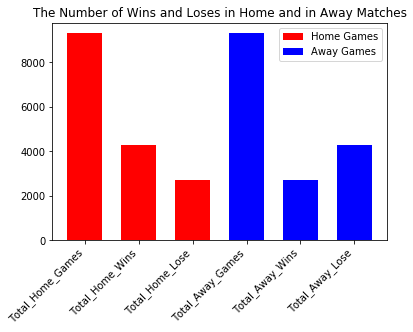

In [36]:
Total_Home_Games = Team['Home_Games'].values.sum()
Total_Away_Games = Team['Away_Games'].values.sum()

Total_Home_Wins = Team['Home_Wins'].values.sum()
Total_Home_Lose = Team['Home_Lose'].values.sum() 

Total_Away_Wins = Team['Away_Wins'].values.sum()
Total_Away_Lose = Team['Away_Lose'].values.sum()
# list of labels of bar chart for matches played at Home
Home_Plot_Obj = ['Total_Home_Games', 'Total_Home_Wins', 'Total_Home_Lose']

# list of labels of bar chart for matches played in an Away
Away_Plot_Obj = ['Total_Away_Games', 'Total_Away_Wins', 'Total_Away_Lose']

# list of sizes of each bar in the bar chart for home matches
Home_Plot_Val = [Team['Home_Games'].values.sum(), Team['Home_Wins'].\
                 values.sum(),Team['Home_Lose'].values.sum() ]
# list of sizes of each bar in  the bar chart for away matches
Away_Plot_Val = [Team['Away_Games'].values.sum(), Team['Away_Wins'].\
                 values.sum(), Team['Away_Lose'].values.sum()]
plt.bar(Home_Plot_Obj, Home_Plot_Val, color = 'r', width = 0.65, label = 'Home Games')
plt.bar(Away_Plot_Obj, Away_Plot_Val, color = 'b', width = 0.65, label = 'Away Games')
plt.xticks(rotation=45, ha = 'right')#set rotation angle of xticks for 45 degrees and its alignment to the right
plt.legend()
plt.title('The Number of Wins and Loses in Home and in Away Matches');

In [37]:
#Merge country and leauge data
countries_leagues = country.merge(League,left_on="id",right_on="id",how="outer")
countries_leagues = countries_leagues.drop("id",axis = 1)
countries_leagues = countries_leagues.rename(columns={'name_x':"country", 'name_y':"league"})

In [38]:
#providing data with necessary columns
matches_new = Match[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]

matches_new = matches_new.drop("id",axis=1)

In [39]:
#merge leauge data with match data
data = matches_new.merge(countries_leagues,left_on="country_id",right_on="country_id",how="outer")
#chech null values
data.isnull().sum()

country_id          0
league_id           2
season              2
stage               2
date                2
match_api_id        2
home_team_api_id    2
away_team_api_id    2
home_team_goal      2
away_team_goal      2
country             0
league              0
dtype: int64

# The Number of Matches by League

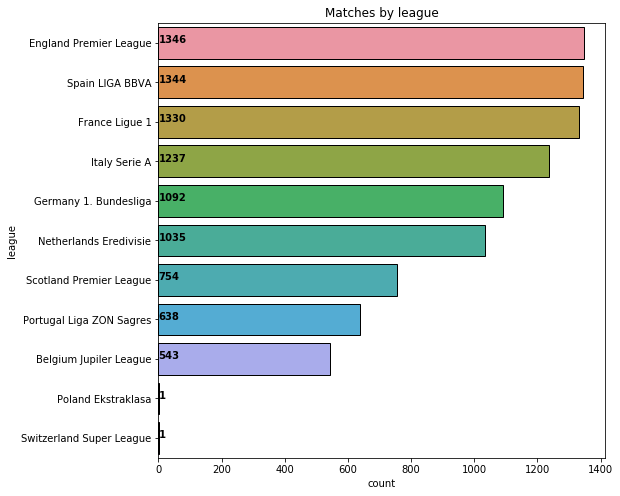

In [40]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y = data["league"],
                   order=data["league"].value_counts().index,
                   linewidth = 1,
                   edgecolor = "k"*data["league"].nunique()
                 )
for i,j in enumerate(data["league"].value_counts().values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Matches by league")
plt.show()

# Home and Away Goals by League

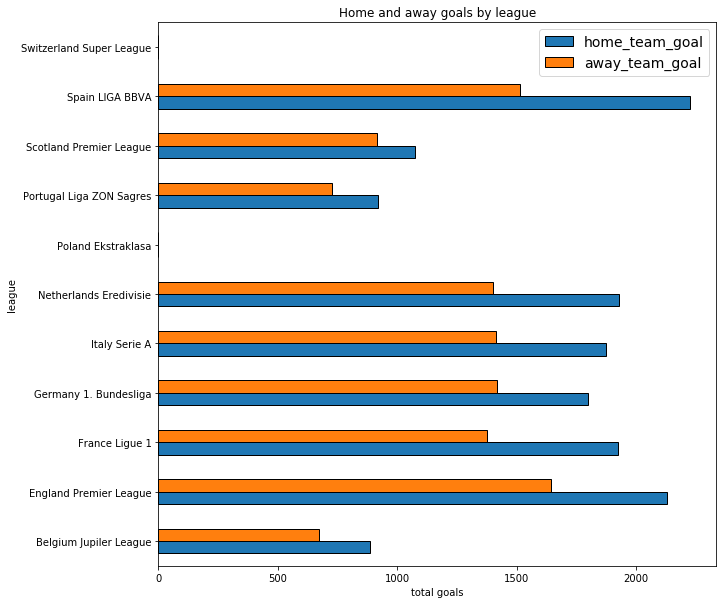

In [41]:
data.groupby("league").agg({"home_team_goal":"sum","away_team_goal":"sum"}).plot(kind="barh",
                                                                                 figsize = (10,10),
                                                                                 edgecolor = "k",
                                                                                 linewidth =1
                                                                                )
plt.title("Home and away goals by league")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("total goals")
plt.show()

In [42]:
#Merge team data
data = data.merge(Team,left_on="home_team_api_id",right_on="team_api_id",how="left")
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"home_team_lname",'team_short_name':"home_team_sname"})
data.columns

KeyError: "['team_fifa_api_id'] not found in axis"

In [43]:
data = data.merge(Team,left_on="away_team_api_id",right_on="team_api_id",how="left")
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"away_team_lname",'team_short_name':"away_team_sname"})
data.columns

KeyError: "['id' 'team_api_id' 'team_fifa_api_id'] not found in axis"

# Top Teams by Their Home and Away Goals

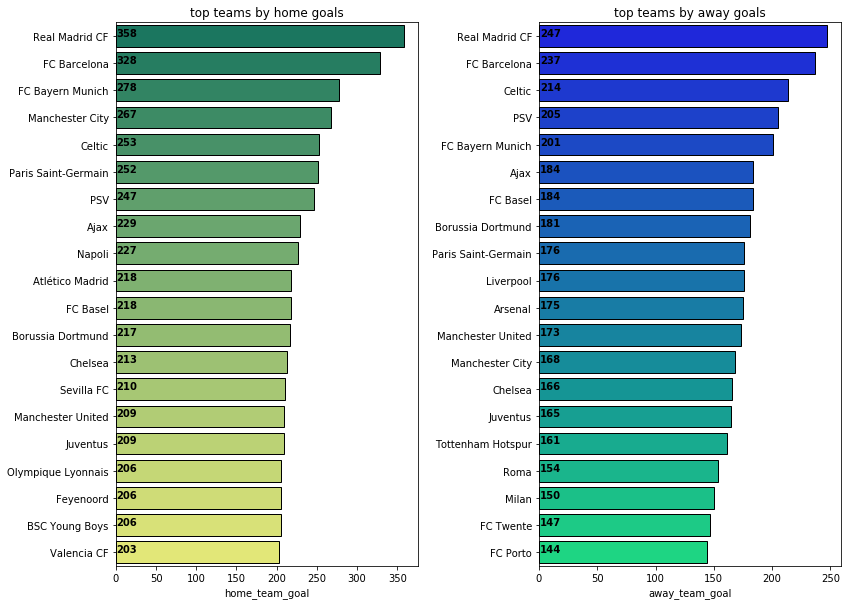

In [35]:
h_t = data.groupby("home_team_lname")["home_team_goal"].sum().reset_index()
a_t = data.groupby("away_team_lname")["away_team_goal"].sum().reset_index()
h_t = h_t.sort_values(by="home_team_goal",ascending= False)
a_t = a_t.sort_values(by="away_team_goal",ascending= False)
plt.figure(figsize=(13,10))
plt.subplot(121)
ax = sns.barplot(y="home_team_lname",x="home_team_goal",
                 data=h_t[:20],palette="summer",
                 linewidth = 1,edgecolor = "k"*20)
plt.ylabel('')
plt.title("top teams by home goals")
for i,j in enumerate(h_t["home_team_goal"][:20]):
    ax.text(.7,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y="away_team_lname",x="away_team_goal",
                 data=a_t[:20],palette="winter",
                linewidth = 1,edgecolor = "k"*20)
plt.ylabel("")
plt.subplots_adjust(wspace = .4)
plt.title("top teams by away goals")
for i,j in enumerate(a_t["away_team_goal"][:20]):
    ax.text(.7,i,j,weight = "bold")

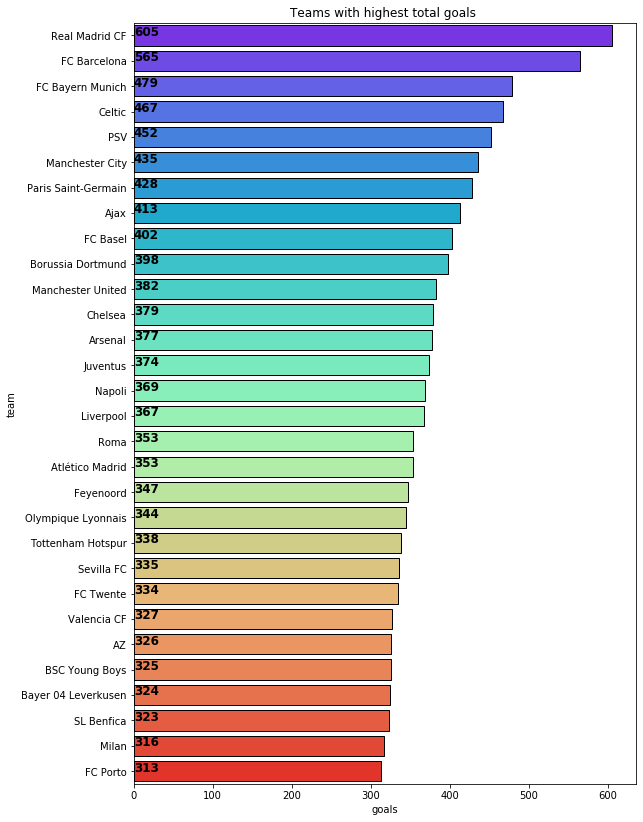

In [36]:
x = h_t
x = x.rename(columns={'home_team_lname':"team", 'home_team_goal':"goals"})
y = a_t
y = y.rename(columns={'away_team_lname':"team", 'away_team_goal':"goals"})
goals = pd.concat([x,y])
goals = goals.groupby("team")["goals"].sum().reset_index().sort_values(by = "goals",ascending = False)
plt.figure(figsize=(9,14))
ax = sns.barplot(x="goals",y="team",
                 data=goals[:30],palette="rainbow",
                linewidth = 1,edgecolor = "k"*30)
for i,j in enumerate(goals["goals"][:30]):
    ax.text(.3,i,j,weight="bold",color = "k",fontsize =12)
plt.title("Teams with highest total goals ")
plt.show()

# Top Wining and Losing Teams

In [41]:
#create new feature for winning team
def label(data):
    if data["home_team_goal"] > data["away_team_goal"]:
        return data["home_team_lname"]
    elif data["away_team_goal"] > data["home_team_goal"]:
        return data["away_team_lname"]
    elif data["home_team_goal"] == data["away_team_goal"]:
        return "DRAW"

In [44]:
data["win"] = data.apply(lambda data:label(data),axis = 1)

In [45]:
#create new feature for outcome of match
def lab(data):
    if data["home_team_goal"] > data["away_team_goal"]:
        return "HOME TEAM WIN"
    elif data["away_team_goal"] > data["home_team_goal"]:
        return "AWAY TEAM WIN"
    elif data["home_team_goal"] == data["away_team_goal"]:
        return "DRAW"

In [46]:
data["outcome_side"] = data.apply(lambda data:lab(data),axis = 1)

In [47]:
#create new feature for losing team
def labe(data):
    if data["home_team_goal"] < data["away_team_goal"]:
        return data["home_team_lname"]
    elif data["away_team_goal"] < data["home_team_goal"]:
        return data["away_team_lname"]
    elif data["home_team_goal"] == data["away_team_goal"]:
        return "DRAW"

In [48]:
data["lost"] = data.apply(lambda data:labe(data),axis=1)

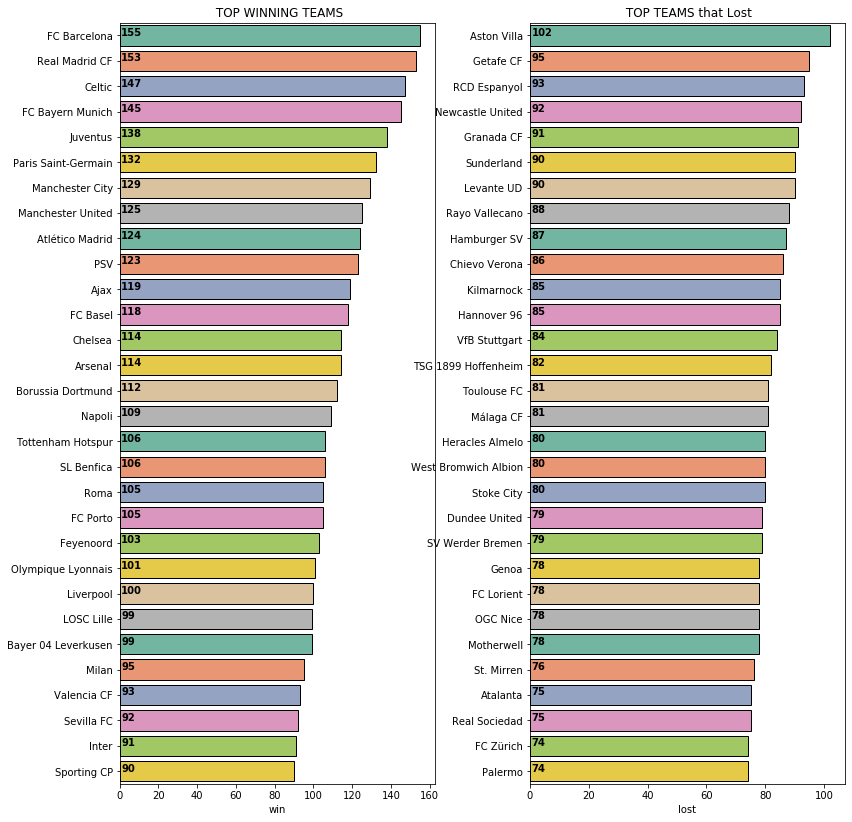

In [49]:
win = data["win"].value_counts()[1:].reset_index()
lost = data["lost"].value_counts()[1:].reset_index()
plt.figure(figsize=(13,14))
plt.subplot(121)
ax = sns.barplot(win["win"][:30],win["index"][:30],
                 palette="Set2",
                linewidth = 1,edgecolor = "k"*30)
plt.title(" TOP WINNING TEAMS")
plt.ylabel("")
for i,j in enumerate(win["win"][:30]):
    ax.text(.7,i,j,color = "black",weight = "bold")
    
plt.subplot(122)
ax = sns.barplot(lost["lost"][:30],lost["index"][:30],
                 palette="Set2",
                linewidth = 1,edgecolor = "k"*30)
plt.title(" TOP TEAMS that Lost")
plt.subplots_adjust(wspace = .3)
plt.ylabel("")
for i,j in enumerate(lost["lost"][:30]):
    ax.text(.7,i,j,color = "black",weight = "bold")

# Performance By Top Teams

In [52]:
x = data.groupby(["home_team_lname","league"]).agg({"match_api_id":"count","home_team_goal":"sum"}).reset_index()
y = data.groupby(["away_team_lname","league"]).agg({"match_api_id":"count","away_team_goal":"sum"}).reset_index()
x = x.rename(columns={'home_team_lname':"team", 'match_api_id':"matches", 'home_team_goal':"goals"})
y = y.rename(columns={'away_team_lname':"team", 'match_api_id':"matches", 'away_team_goal':"goals"})
xy = pd.concat([x,y])
xy = xy.groupby(["team","league"])[["matches","goals"]].sum().reset_index()
xy = xy.sort_values(by="goals",ascending=False)


#merge win,draw and lost data of team to matches played
f = xy.merge(win,left_on="team",right_on="index",how="left")
f = f.drop("index",axis =1)
f = f.rename(columns={"outcome":"wins"})
f = f.merge(lost,left_on="team",right_on="index",how="left")
f = f.drop("index",axis =1)
dr = data[data["outcome_side"] == "DRAW"][["home_team_lname","away_team_lname"]]
l  = dr["home_team_lname"].value_counts().reset_index()
v  = dr["away_team_lname"].value_counts().reset_index()
l  = l.rename(columns={'index':"team", 'home_team_lname':"draw"})
v  = v.rename(columns={'index':"team", 'away_team_lname':"draw"})
lv = pd.concat([l,v])
lv = lv.groupby("team")["draw"].sum().reset_index()
f = f.merge(lv,left_on="team",right_on="team",how ="left")

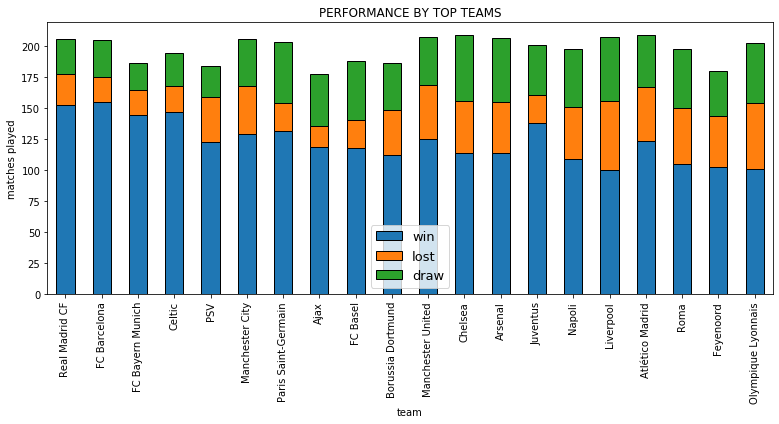

In [53]:
f = f.sort_values(by="goals",ascending=False)
f_new = f.copy()
f_new.index = f_new.team
f_new[["win","lost","draw"]][:20].plot(kind = "bar",figsize=(13,5),
                                   stacked =True,linewidth = 1,
                                   edgecolor = "k"*20
                                  )
plt.legend(loc="best",prop = {"size" : 13})
plt.title("PERFORMANCE BY TOP TEAMS")
plt.ylabel("matches played")
plt.show()

# Teams and Player Ratings and Attributes
---
This part will be focusing mainly on the individual teams, and how the attributes of indivdual players add up to form a bigger picture. A team's style of play would varry drastically according to what kind of players are present in the team.

In [55]:
Team_Attributes
Team
team_info =  Team_Attributes.merge(Team,left_on="team_api_id",right_on="team_api_id",how="left")
team_info.head()

id_x  team_fifa_api_id_x  team_api_id                 date  buildUpPlaySpeed buildUpPlaySpeedClass buildUpPlayDribblingClass  buildUpPlayPassing buildUpPlayPassingClass buildUpPlayPositioningClass  chanceCreationPassing chanceCreationPassingClass  chanceCreationCrossing chanceCreationCrossingClass  chanceCreationShooting chanceCreationShootingClass chanceCreationPositioningClass  defencePressure defencePressureClass  defenceAggression defenceAggressionClass  defenceTeamWidth defenceTeamWidthClass defenceDefenderLineClass   id_y  team_fifa_api_id_y team_long_name team_short_name
0     2                 434         9930  2014-09-19 00:00:00                52              Balanced                    Normal                  56                   Mixed                   Organised                     54                     Normal                      63                      Normal                      64                      Normal                      Organised               47               Medium                 44                  Press                54                Normal                    Cover  49119               434.0       FC Aarau             AAR
1     3                 434         9930  2015-09-10 00:00:00                47              Balanced                    Normal                  54                   Mixed                   Organised                     54                     Normal                      63                      Normal                      64                      Normal                      Organised               47               Medium                 44                  Press                54                Normal                    Cover  49119               434.0       FC Aarau             AAR
2     5                  77         8485  2011-02-22 00:00:00                47              Balanced                    Little                  52                   Mixed                   Organised                     53                     Normal                      48                      Normal                      52                      Normal                      Organised               47               Medium                 47                  Press                52                Normal                    Cover  39393                77.0       Aberdeen             ABE
3     6                  77         8485  2012-02-22 00:00:00                58              Balanced                    Little                  62                   Mixed                   Organised                     45                     Normal                      70                        Lots                      55                      Normal                      Organised               40               Medium                 40                  Press                60                Normal                    Cover  39393                77.0       Aberdeen             ABE
4     7                  77         8485  2013-09-20 00:00:00                62              Balanced                    Little                  45                   Mixed                   Organised                     40                     Normal                      50                      Normal                      55                      Normal                      Organised               42               Medium                 42                  Press                60                Normal                    Cover  39393                77.0       Aberdeen             ABE

In [58]:
team_info = team_info.drop(['id_x','id_y', 'team_fifa_api_id_y'],axis=1)
team_info["date"] = pd.to_datetime(team_info["date"],format="%Y-%m-%d")

KeyError: "['id_x' 'id_y' 'team_fifa_api_id_y'] not found in axis"

In [59]:
columns= team_info.columns
cat_col= columns[columns.str.contains("Class")].tolist()
num_col= [x for x in team_info.columns if x not in columns[columns.str.contains("Class")].tolist()+["team_api_id"]+['team_fifa_api_id_x']+["date"]+['team_long_name']+[ 'team_short_name']]
categorical_team_info = team_info[cat_col+["team_api_id"]+['team_fifa_api_id_x']+["date"]+['team_long_name']+[ 'team_short_name']]
numerical_team_info   = team_info[num_col+["team_api_id"]+['team_fifa_api_id_x']+["date"]+['team_long_name']+[ 'team_short_name']]

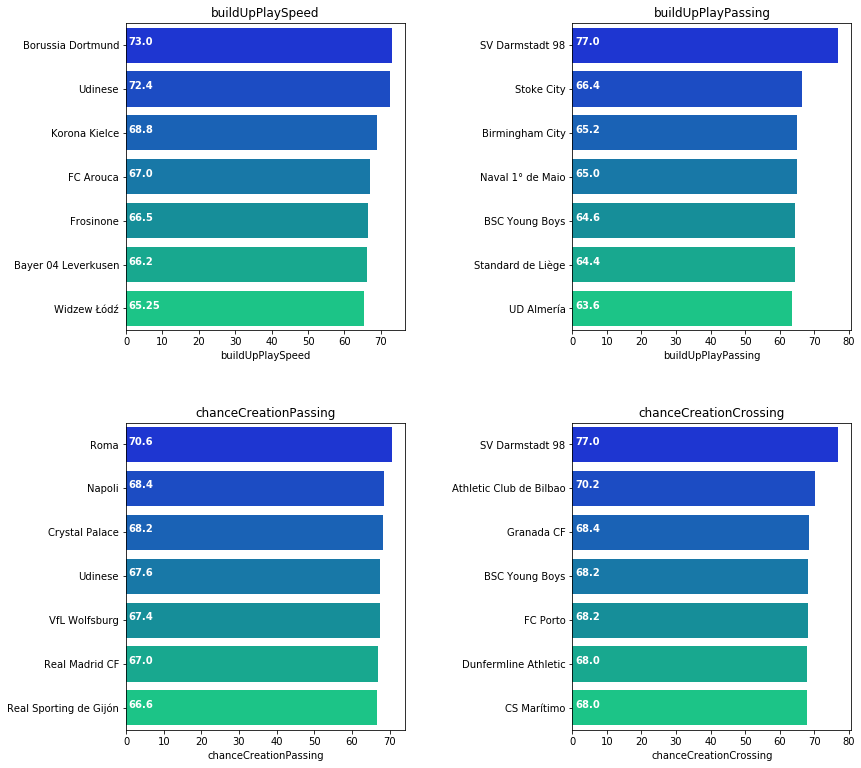

In [80]:
numerical_team_info
n = numerical_team_info.groupby("team_long_name")[num_col].mean().reset_index()
cols = [x for x in n.columns if x not in ["team_long_name"]]
length = len(cols)
plt.figure(figsize=(13,13))
for i,j in itertools.zip_longest(cols,range(length)):
    if(j<4):
        plt.subplot(length/3,length/3,j+1)
        ax = sns.barplot(i,"team_long_name",data=n.sort_values(by=i,ascending=False)[:7],palette="winter")
        plt.title(i)
        plt.subplots_adjust(wspace = .6,hspace =.3)
        plt.ylabel("")
        for i,j in enumerate(round(n.sort_values(by = i,ascending=False)[i][:7],2)):
            ax.text(.7,i,j,weight = "bold",color="white") 

### Exploring how different attributes are distributed among the various teams
Insights into how the player attributes effect each team's play style and possibilty of winning a match

C:\Users\Mostafa\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


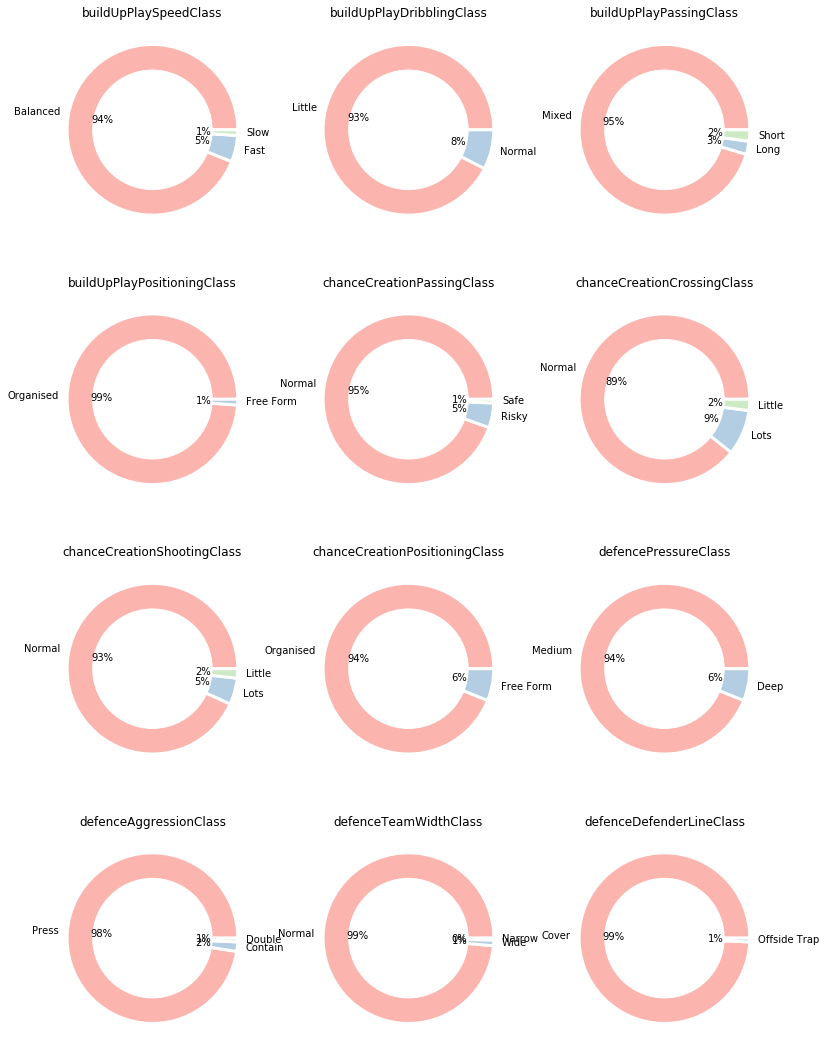

In [81]:
from scipy.stats import mode

c = categorical_team_info.groupby("team_long_name").agg({"buildUpPlaySpeedClass":lambda x:mode(x)[0],
                                                    "buildUpPlayDribblingClass":lambda x:mode(x)[0],
                                                    'buildUpPlayPassingClass':lambda x:mode(x)[0],
                                                    'buildUpPlayPositioningClass':lambda x:mode(x)[0],
                                                    'chanceCreationPassingClass':lambda x:mode(x)[0],
                                                    'chanceCreationCrossingClass':lambda x:mode(x)[0],
                                                     'chanceCreationShootingClass':lambda x:mode(x)[0],
                                                     'chanceCreationPositioningClass':lambda x:mode(x)[0],
                                                     'defencePressureClass':lambda x:mode(x)[0],
                                                     'defenceAggressionClass':lambda x:mode(x)[0],
                                                     'defenceTeamWidthClass':lambda x:mode(x)[0],
                                                     'defenceDefenderLineClass':lambda x:mode(x)[0]}).reset_index()
cat_col
plt.figure(figsize=(13,19))
for i,j in itertools.zip_longest(cat_col,range(len(cat_col))):
    plt.subplot(4,3,j+1)
    plt.pie(c[i].value_counts().values,labels=c[i].value_counts().keys(),
            wedgeprops={"linewidth":3,"edgecolor":"w"},
           colors=sns.color_palette("Pastel1"),autopct = "%1.0f%%")
    my_circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(my_circ)
    plt.title(i)
    plt.xlabel("")

## The Combined Overall Rating
---
In order for us to reach a plausible conclusion about how team ratings affect the preformance of a team, first we have to combine the ratings of players per team into one feature which w will call the CoR. The CoR will provide valuable insights into the projected value of each team's players. Eventually we would like to conclude if these values matter in the grand scheme of football.  

In [95]:
Home_Team = Match.columns.tolist()[6:17]
Away_Team = Match.columns.tolist()[17:]
Match_Years = Match.copy().drop_duplicates('date')['date'].tolist(); Match_Years

['2011-01-18 00:00:00',
 '2011-03-23 00:00:00',
 '2011-02-15 00:00:00',
 '2011-02-16 00:00:00',
 '2011-02-23 00:00:00',
 '2011-02-02 00:00:00',
 '2011-02-26 00:00:00',
 '2011-02-27 00:00:00',
 '2011-01-23 00:00:00',
 '2011-01-22 00:00:00',
 '2011-01-21 00:00:00',
 '2011-01-29 00:00:00',
 '2011-01-30 00:00:00',
 '2011-01-28 00:00:00',
 '2011-02-05 00:00:00',
 '2011-02-04 00:00:00',
 '2011-02-06 00:00:00',
 '2011-02-12 00:00:00',
 '2011-02-13 00:00:00',
 '2011-02-19 00:00:00',
 '2011-02-20 00:00:00',
 '2011-03-04 00:00:00',
 '2011-03-06 00:00:00',
 '2011-03-05 00:00:00',
 '2011-03-12 00:00:00',
 '2011-03-20 00:00:00',
 '2011-03-19 00:00:00',
 '2011-07-29 00:00:00',
 '2011-07-30 00:00:00',
 '2011-07-31 00:00:00',
 '2011-10-16 00:00:00',
 '2011-10-15 00:00:00',
 '2011-10-23 00:00:00',
 '2011-10-22 00:00:00',
 '2011-10-29 00:00:00',
 '2011-10-30 00:00:00',
 '2011-11-06 00:00:00',
 '2011-11-05 00:00:00',
 '2011-11-04 00:00:00',
 '2011-11-20 00:00:00',
 '2011-11-19 00:00:00',
 '2011-11-18 00:

In [97]:
#calculate COR of a team playing at Home


Home_Team_COR = 0

for year in Match_Years:
    for row in Match.loc[Match['date'] == year].index.values:
        for id in Match.loc[row, Home_Team].tolist():
            if id in Player_Attributes.loc[Player_Attributes['date'] == year]['player_api_id'].tolist():
                Home_Team_COR += Player_Attributes.loc[Player_Attributes.loc\
                                                         [Player_Attributes['date'] == year].loc\
                                                         [Player_Attributes['player_api_id'] == id]\
                                                         .index[0],'overall_rating']
            else:
                Home_Team_COR = 0
                break
        Match.at[row,'Home_Team_COR'] = Home_Team_COR
        Home_Team_COR = 0
        


In [98]:
#calculate COR of a team playing Away
Away_Team_COR = 0 
for year in Match_Years:
    for row in Match.loc[Match['date'] == year].index.values:
        for id in Match.loc[row, Away_Team].tolist():
            if id in Player_Attributes.loc[Player_Attributes['date'] == year]['player_api_id'].tolist():
                Away_Team_COR += Player_Attributes.loc\
                [Player_Attributes.loc[Player_Attributes['date'] == year].loc\
                 [Player_Attributes['player_api_id'] == id].index[0],'overall_rating']
            else:           
                Away_Team_COR = 0
                break
        Match.at[row,'Away_Team_COR'] = Away_Team_COR
        Away_Team_COR = 0


### Does bigger CoR gurantee Victory?
The next step would be to use our newly found CoR and actually find out about the possibilty of a team with higher Cor winning a match agains a team which scored lower in CoR

In [ ]:

COR_advantage = 0
COR_disadvantage = 0

for row in range(Match.shape[0]):

    if Match.at[row,'home_team_goal'] > Match.at[row,'away_team_goal'] and \
    Match.at[row,'Home_Team_COR'] > Match.at[row,'Away_Team_COR']:
        COR_advantage += 1
    elif Match.at[row,'home_team_goal'] < Match.at[row,'away_team_goal'] and \
    Match.at[row,'Home_Team_COR'] < Match.at[row,'Away_Team_COR']:
        COR_advantage += 1    
    if Match.at[row,'home_team_goal'] < Match.at[row,'away_team_goal'] and \
    Match.at[row,'Home_Team_COR'] > Match.at[row,'Away_Team_COR']:
        COR_disadvantage += 1
    elif Match.at[row,'home_team_goal'] > Match.at[row,'away_team_goal'] and \
    Match.at[row,'Home_Team_COR'] < Match.at[row,'Away_Team_COR']:
        COR_disadvantage += 1

In [ ]:
Total_Matches = Match.shape[0]
Bigger_COR_Wins = COR_advantage / Total_Matches
Low_COR_Wins = COR_disadvantage / Total_Matches
COR_Draw = (Total_Matches - (COR_advantage + COR_disadvantage)) / Total_Matches


In [ ]:

labels = ['Bigger_COR_Wins', 'Low_COR_Wins', 'COR_Draw'] 
sizes = [Bigger_COR_Wins, Low_COR_Wins, COR_Draw ] 
explode = (0, 0.2, 0.2)       
colors = ['red', 'blue', 'green'] 
plt.pie(sizes, explode = explode, colors = colors, labels = labels, shadow = True, startangle = 90)
plt.axis('equal'); 